In [1]:
import torch
from torch import nn
from d2l import torch as d2l


In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [3]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')


In [5]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)


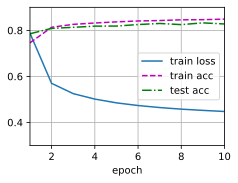

In [6]:
num_epoch = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epoch, trainer)

In [7]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [8]:
len(y_hat)

2

In [9]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10),
)

loss_fn = nn.CrossEntropyLoss()

x = torch.rand(2,1,28,28)
y = torch.tensor([3,5])

logits = net(x)
loss = loss_fn(logits, y)
print(f'Logits的输出是：{logits}\n CrossEntropyLoss:{loss}')

Logits的输出是：tensor([[-0.0828,  0.0207,  0.0158, -0.0839, -0.0017,  0.0379, -0.0420, -0.0165,
          0.1573, -0.1469],
        [-0.0561,  0.1168,  0.0622,  0.0629,  0.0622,  0.0011, -0.1066,  0.0049,
          0.1351,  0.0321]], grad_fn=<AddmmBackward0>)
 CrossEntropyLoss:2.3554255962371826


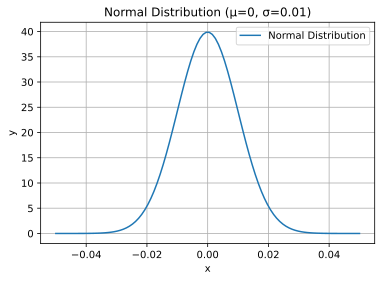

In [16]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 0.01

x = np.linspace(-0.05,0.05, 100)
pdf = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

plt.figure(figsize=(6,4))
plt.plot(x,pdf,label = "Normal Distribution")
plt.title("Normal Distribution (μ=0, σ=0.01)")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()
